<img src="https://orcid-member-logos.s3.us-east-2.amazonaws.com/0010f00002HK16cAAD.png" alt="SMU Logo" style="display: block; margin-left: auto; margin-right: auto; width: 400px;">

<p style="text-align: center; font-size: 28px; font-weight: bold;">
    Southern Methodist University
    <br>Lyle School of Engineering
</p>

<p style="text-align: center; font-size: 22px;">
    Exploring-Table-Data-Analysis
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>

# &bull; Business Understanding


### &nbsp;&nbsp;&nbsp;&nbsp;- Abstract and Overview
<p style="padding: 20px; font-size: 18px;">Being autistic doesn't mean that you have a disease; it means that your brain works differently from others. Early diagnosis of autism can provide individuals with the opportunity to develop crucial skills, enhance their ability to engage with the community and increase their independence. Additionally, early diagnosis benefits parents by providing clarity and direction, enabling them to take proactive steps in supporting their child's growth, rather than facing uncertainty and concern over atypical behaviors. The dataset, "Autism Screening for Toddlers," provides information gathered from screening toddlers for signs of autism. The data was likely collected to identify children who may be at risk for autism at an early age, enabling early diagnosis and treatment. Autism is a developmental disorder that affects communication and behavior.
</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Purpose 
<p style="padding: 20px; font-size: 18px;">The dataset contains several variables that describe different characteristics and behaviors of toddlers, such as their responses to specific questions related to autism symptoms. It also includes a final classification of whether a child is considered at risk for autism or not.The main cause of autism is not known until now; the goal of this study was to use the Diagnostic and Statistical Manual of Mental Disorders, Fifth Edition (DSM-5) to identify autism using a model created by machine learning techniques.
"<i>The data for the Autistic Spectrum Disorder Screening Data for Toddlers was collected using a mobile application called ASDTests, designed specifically for screening toddlers for Autism Spectrum Disorder (ASD).</i>"</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Prediction Task and Third-Party Interest 
<p style="padding: 20px; font-size: 18px;">The dataset contains several variables that describe different characteristics and behaviors of toddlers, such as their responses to specific questions related to autism symptoms. It also includes demographic information and a final classification of whether a child is considered at risk for autism or not.The primary prediction task in this dataset is to determine whether a toddler is at risk of autism based on the input features. The goal is to develop a model that can accurately predict a child’s risk for autism, assisting healthcare professionals or caregivers in identifying potential cases that require further investigation or diagnosis. Third parties like healthcare providers, pediatricians, or child development experts are likely interested in these results. For them, a highly accurate prediction model could be a valuable tool in enhancing the early detection of autism. Additionally, organizations that develop early intervention programs or policies aimed at childhood developmental disorders may find the data helpful in shaping their strategies.</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Model Performance
<p style="padding: 20px; font-size: 18px;">A prediction algorithm would need to achieve high sensitivity <strong>true positive rate</strong> to minimize the risk of missing children who are actually at risk. At the same time, it would need to maintain a reasonable level of specificity <strong>true negative rate</strong> to avoid overburdening healthcare systems with false positives. The model would need to perform significantly better than random guessing to be considered useful in practice. For example, a model with around 90-100% accuracy, and balanced sensitivity and specificity, would likely be considered effective for early diagnosis purposes.</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Data Aspects
<p style="padding: 20px; font-size: 18px;">The dataset contains behavioral features (Q-Chat-10) and other individual characteristics. This dataset includes different data types (nominal/categorical, binary, and continuous), with 1,054 instances. </p>

# &bull; Data Understanding


In [2]:
#Required dependencies
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from itertools import product

### - Data Overview

In [3]:
dataframe=pd.read_csv("Toddler Autism dataset July 2018.csv")
print(dataframe)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

### - Data Features

In [4]:
dataframe.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

### - Number of records

In [5]:
print(len(dataframe))

1054


### - Attributes Overview

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### - Numeric values description

In [7]:
dataframe.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### - Relevant Attributes and data quality
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>DSM-5 Criteria for ASD</title>
    <style>
        .content {
            padding: 20px;
            font-size: 18px;
        }
    </style>
</head>
<body>
    <p class="content">
        The Diagnostic and Statistical Manual of Mental Disorders (DSM) is the handbook used by health care professionals as the authoritative guide to the diagnosis of mental disorders.
        <strong>DSM-5 Criteria for ASD</strong><br>
        People with ASD show a persistent pattern of inattention and/or hyperactivity–impulsivity that interferes with functioning or development as shown on the image below:
        <br><br>
        <strong>A. PERSISTENT DEFICITS IN SOCIAL COMMUNICATION AND SOCIAL INTERACTION ACROSS CONTEXTS, NOT ACCOUNTED FOR BY GENERAL DEVELOPMENTAL DELAYS, AND MANIFEST BY 3 OF 3 SYMPTOMS:</strong><br>
        A1. Deficits in social‐emotional reciprocity; ranging from abnormal social approach and failure of normal back and forth conversation through reduced sharing of interests, emotions, and affect and response to total lack of initiation of social interaction.<br>
        A2. Deficits in nonverbal communicative behaviors used for social interaction; ranging from poorly integrated verbal and nonverbal communication, through abnormalities in eye contact and body‐language, or deficits in understanding and use of nonverbal communication, to total lack of facial expression or gestures.<br>
        A3. Deficits in developing and maintaining relationships, appropriate to developmental level (beyond those with caregivers); ranging from difficulties adjusting behavior to suit different social contexts through difficulties in sharing imaginative play and in making friends to an apparent absence of interest in people.<br><br>
        <strong>B. RESTRICTED, REPETITIVE PATTERNS OF BEHAVIOR, INTERESTS, OR ACTIVITIES AS MANIFESTED BY AT LEAST 2 OF 4 SYMPTOMS:</strong><br>
        B1. Stereotyped or repetitive speech, motor movements, or use of objects; (such as simple motor stereotypies, echolalia, repetitive use of objects, or idiosyncratic phrases).<br>
        B2. Excessive adherence to routines, ritualized patterns of verbal or nonverbal behavior, or excessive resistance to change; (such as motoric rituals, insistence on the same route or food, repetitive questioning, or extreme distress at small changes).<br>
        B3. Highly restricted, fixated interests that are abnormal in intensity or focus; (such as strong attachment to or preoccupation with unusual objects, excessively circumscribed, or perseverative interests).<br>
        B4. Hyper‐or hypo‐reactivity to sensory input or unusual interest in sensory aspects of the environment; (such as apparent indifference to pain/heat/cold, adverse response to specific sounds or textures, excessive smelling or touching of objects, fascination with lights or spinning objects).  
    </p>
</body>
</html>
<div style="text-align: center;">
  <img src="DSM5.jpg" alt="TukeyBoxplot" width="500" height="500">
</div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        .centered-table {
            margin: auto;
            border-collapse: collapse;
            width: 60%;
            text-align: left;
        }
        .centered-table th, .centered-table td {
            border: 1px solid #ddd;
            padding: 8px;
        }
        .centered-table caption {
            caption-side: bottom;
            font-weight: bold;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <p>The table titled "Details of Variables Mapping to the Q-Chat-10 Screening Methods" illustrates how each variable (A1 to A10) in the dataset corresponds to specific behavioral questions from the Q-Chat-10 questionnaire used to screen for Autism Spectrum Disorder (ASD) in toddlers. These questions assess various social and behavioral traits, such as eye contact, sensitivity to sensory inputs, and repetitive behaviors, which are key indicators in the early detection of ASD.</p>
    <table class="centered-table">
        <caption>Details of variables mapping to the Q-Chat-10 screening methods</caption>
        <thead>
            <tr>
                <th>Variable in Dataset</th>
                <th>Corresponding Q-chat-10-Toddler Features</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>A1</td>
                <td>Does your child look at you when you call his/her name?</td>
            </tr>
            <tr>
                <td>A2</td>
                <td>How easy is it for you to get eye contact with your child?</td>
            </tr>
            <tr>
                <td>A3</td>
                <td>Does your child need things to always happen in the same way?</td>
            </tr>
            <tr>
                <td>A4</td>
                <td>Does your child show sensitivity to light, noise, or loud sounds?</td>
            </tr>
            <tr>
                <td>A5</td>
                <td>Does your child pretend? (e.g., care for dolls, talk on a toy phone)</td>
            </tr>
            <tr>
                <td>A6</td>
                <td>Does your child follow where you’re looking?</td>
            </tr>
            <tr>
                <td>A7</td>
                <td>If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g., stroking hair, hugging them)</td>
            </tr>
            <tr>
                <td>A8</td>
                <td>Does your child speak in a repetitive way?</td>
            </tr>
            <tr>
                <td>A9</td>
                <td>Does your child use simple gestures? (e.g., wave goodbye)</td>
            </tr>
            <tr>
                <td>A10</td>
                <td>Does your child stare at nothing with no apparent purpose?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
</head>
<body>
    <p>Using the data above, we have analyzed and categorized each question into specific DSM-5 groups (A, B):</p>
    <ul>
        <li>Question A1 refers to A1 in Group A.</li>
        <li>Question A2 refers to A2 in Group A.</li>
        <li>Question A3 refers to B2 in Group B.</li>
        <li>Question A4 refers to B4 in Group B.</li>
        <li>Question A5 refers to A3 in Group A.</li>
        <li>Question A6 refers to A2 in Group A.</li>
        <li>Question A7 refers to A2 in Group A.</li>
        <li>Question A8 refers to B1 in Group B.</li>
        <li>Question A9 refers to A1 in Group A.</li>
        <li>Question A10 refers to B3 in Group B.</li>
    </ul>
    <p>As we can see, there are multiple questions related to the same group, resulting in duplicate instances within the same group . Therefore, we decided to combine related questions into a single column <strong>using logical or</strong> and drop the redundant columns. <strong>A1 , A9</strong> and <strong> A2 , A6 , A7</strong></p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <style>
        .centered-table {
            margin: auto;
            border-collapse: collapse;
            width: 70%;
            text-align: left;
        }
        .centered-table th, .centered-table td {
            border: 1px solid #ddd;
            padding: 8px;
        }
        .centered-table caption {
            caption-side: bottom;
            font-weight: bold;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <table class="centered-table">
        <caption>Details of variables after classifying questions into categories</caption>
        <thead>
            <tr>
                <th>Variable in Dataset</th>
                <th>Corresponding Q-chat-10-Toddler Features</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>A1</td>
                <td>Does your child look at you when you call his/her name?<br>
                    Or does your child use simple gestures?</td>
            </tr>
            <tr>
                <td>A2</td>
                <td></td>
            </tr>
            <tr>
                <td>A3</td>
                <td>Does your child need things to always happen in the same way?</td>
            </tr>
            <tr>
                <td>A4</td>
                <td>Does your child show sensitivity to light, noise or loud sounds?</td>
            </tr>
            <tr>
                <td>A5</td>
                <td>Does your child pretend? (e.g., care for dolls, talk on a toy phone)</td>
            </tr>
            <tr>
                <td>A6</td>
                <td></td>
            </tr>
            <tr>
                <td>A7</td>
                <td>If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g., stroking hair, hugging them) or how easy is it for you to get eye contact with your child?<br>
                    Or does your child follow where you’re looking?</td>
            </tr>
            <tr>
                <td>A8</td>
                <td></td>
            </tr>
            <tr>
                <td>A9</td>
                <td></td>
            </tr>
            <tr>
                <td>A10</td>
                <td>Does your child stare at nothing with no apparent purpose?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

In [8]:
updated_df= copy.deepcopy(dataframe)
updated_df["A1"]=updated_df["A1"] | updated_df["A9"]
updated_df["A7"]=updated_df["A2"] | updated_df["A6"] | updated_df["A7"]

In [9]:
updated_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### - Compare columns to verify data update

In [10]:
column_comparison = dataframe['A1'].compare(updated_df['A1'])
print(column_comparison)

      self  other
7      0.0    1.0
28     0.0    1.0
55     0.0    1.0
57     0.0    1.0
64     0.0    1.0
...    ...    ...
1027   0.0    1.0
1028   0.0    1.0
1039   0.0    1.0
1046   0.0    1.0
1050   0.0    1.0

[141 rows x 2 columns]


In [11]:
column_comparison2 = dataframe['A7'].compare(updated_df['A7'])
print(column_comparison2)

      self  other
6      0.0    1.0
9      0.0    1.0
22     0.0    1.0
23     0.0    1.0
80     0.0    1.0
...    ...    ...
1011   0.0    1.0
1023   0.0    1.0
1028   0.0    1.0
1033   0.0    1.0
1053   0.0    1.0

[167 rows x 2 columns]


### - Drop Features A2, A6, A9

In [12]:
updated_df.drop('A2',axis=1,inplace=True)
updated_df.drop('A6',axis=1,inplace=True)
updated_df.drop('A9',axis=1,inplace=True)

In [13]:
updated_df.head()

,Case_No,A1,A3,A4,A5,A7,A8,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,1,1,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,0,0,0,1,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,1,1,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,0,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### - Drop Qchat-10-Score Feature
<p style="padding: 20px; font-size: 18px;">We are going to drop this feature for two reasons: first, we can derive this feature by adding the values from A1 to A10. Additionally, we have decided to drop columns related to these results. </p>

In [14]:
updated_df.drop('Qchat-10-Score',axis=1,inplace=True)
updated_df.head()

,Case_No,A1,A3,A4,A5,A7,A8,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,1,1,1,28,f,middle eastern,yes,no,family member,No
1,2,1,0,0,0,1,0,0,36,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,1,1,1,36,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,5,1,0,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


### - Drop Case_No

In [15]:
updated_df.drop('Case_No',axis=1,inplace=True)
updated_df.head()

,A1,A3,A4,A5,A7,A8,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,1,1,1,28,f,middle eastern,yes,no,family member,No
1,1,0,0,0,1,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,1,1,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,0,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


### - Data Transofrmation
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <p>
        Autism Spectrum Disorder (ASD) often presents with a range of symptoms that can manifest similarly across different stages of early childhood, including limited eye contact, delayed speech and babbling, restricted use of gestures, repetitive behaviors, and challenges with social engagement and interaction with peers. These symptoms, though consistent in nature, can vary in their expression and severity depending on the child's age and developmental stage. By categorizing age into specific ranges such as:
    </p>
    <ul>
        <li>
            <strong>12-18 months: Early Toddler</strong> 
            <em>(monitor for early signs like limited eye contact, delayed babbling)</em>
        </li>
        <li>
            <strong>19-24 months: Mid Toddler</strong> 
            <em>(look for delays in speech, limited use of gestures)</em>
        </li>
        <li>
            <strong>25-30 months: Late Toddler</strong> 
            <em>(observe social engagement, repetitive behaviors)</em>
        </li>
        <li>
            <strong>31-36 months: Preschool Entry</strong> 
            <em>(focus on social skills, interaction with peers)</em>
        </li>
    </ul>
    <p>
        We can more precisely monitor and identify the early signs of ASD that are most relevant to each developmental phase. This approach allows for targeted observation of symptoms like limited eye contact in Early Toddlers or social engagement difficulties in Late Toddlers. This structured age categorization informs our decision to apply transformations that maintain the relative significance of each age group, ensuring that critical developmental milestones and symptom markers are accurately reflected and analyzed in the data. By using such transformations, we aim to enhance the sensitivity of our assessments, facilitating earlier and more precise identification of ASD traits, which is crucial for timely interventions.
    </p>
</body>
</html>

In [16]:
updated_df['Age_Mons'] = pd.cut(updated_df['Age_Mons'],
                                 [12, 18, 24, 30, 36],
                                 labels=['Early Toddler', 'Mid Toddler', 'Late Toddler', 'Preschool Entry'],
                               right=True, # to include the upper bound  
                               include_lowest=True  ) # to include the lowest bound
updated_df.rename(columns={'Age_Mons': 'Age_range'}, inplace=True)
updated_df.head()

,A1,A3,A4,A5,A7,A8,A10,Age_range,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,1,1,1,Late Toddler,f,middle eastern,yes,no,family member,No
1,1,0,0,0,1,0,0,Preschool Entry,m,White European,yes,no,family member,Yes
2,1,0,0,0,1,1,1,Preschool Entry,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,Mid Toddler,m,Hispanic,no,no,family member,Yes
4,1,0,1,1,1,1,1,Mid Toddler,f,White European,no,yes,family member,Yes


### - Missing Data Visualization
<p><strong>Missing data</strong> in a dataset refers to the absence of values or information for certain variables within the dataset, which can occur due to various reasons such as data entry errors, equipment malfunctions, respondent refusal, or loss of data during collection and processing. Missing data can significantly impact the analysis and accuracy of models, as it can introduce biases, reduce the statistical power, and complicate the interpretation of results. It's essential to identify and handle missing data appropriately to ensure the reliability and validity of any analysis or predictive models.</p>

<p>After visualizing the data, as shown in the graph below, we did not find any missing data in the dataset. This indicates that the dataset is complete and can be used for further analysis without needing additional data imputation or cleaning steps related to missing values.</p>

In [17]:
print("Missing values in each column:")
print(updated_df.isnull().sum())

Missing values in each column:
A1                        0
A3                        0
A4                        0
A5                        0
A7                        0
A8                        0
A10                       0
Age_range                 0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64


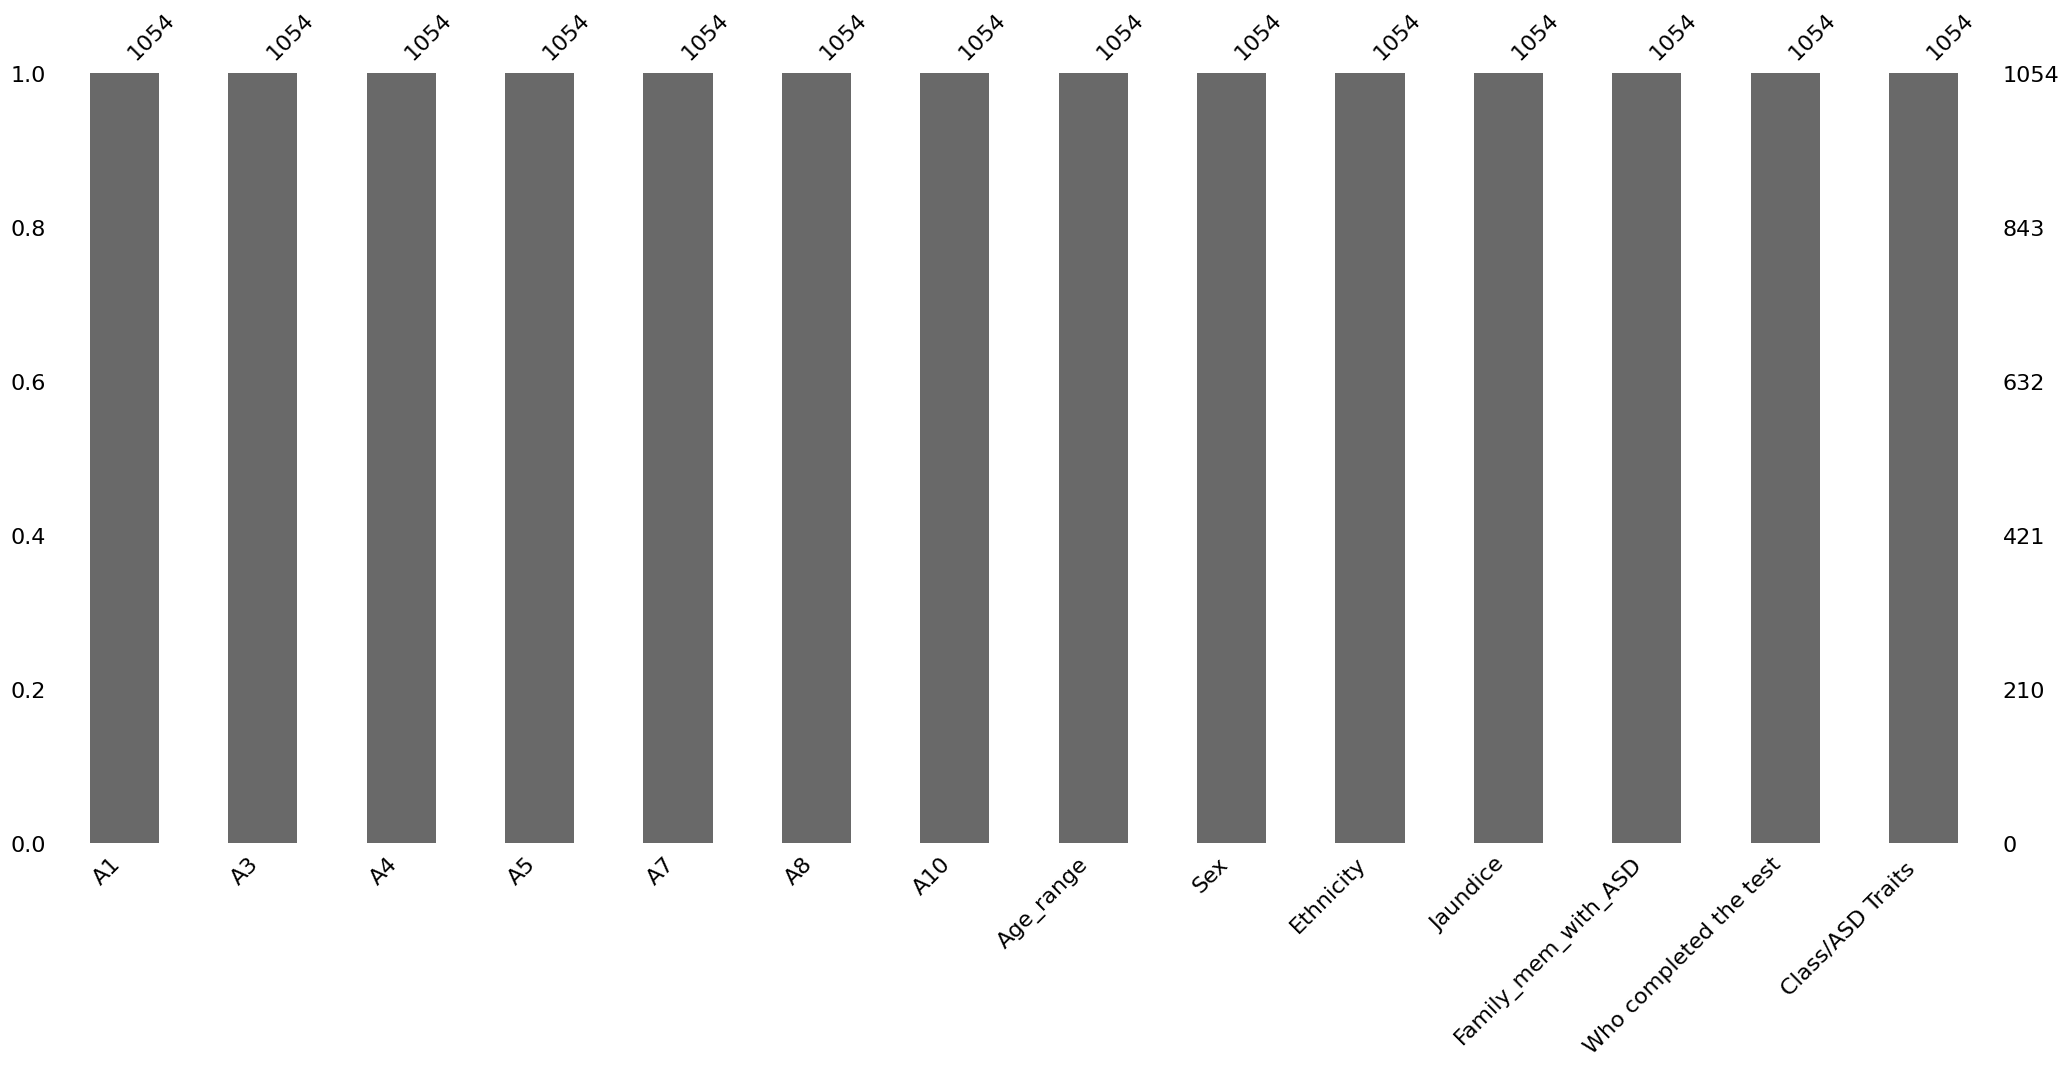

In [18]:
# Visualize missing data using missingno 
msno.bar(updated_df)
plt.show()

### - Outliers

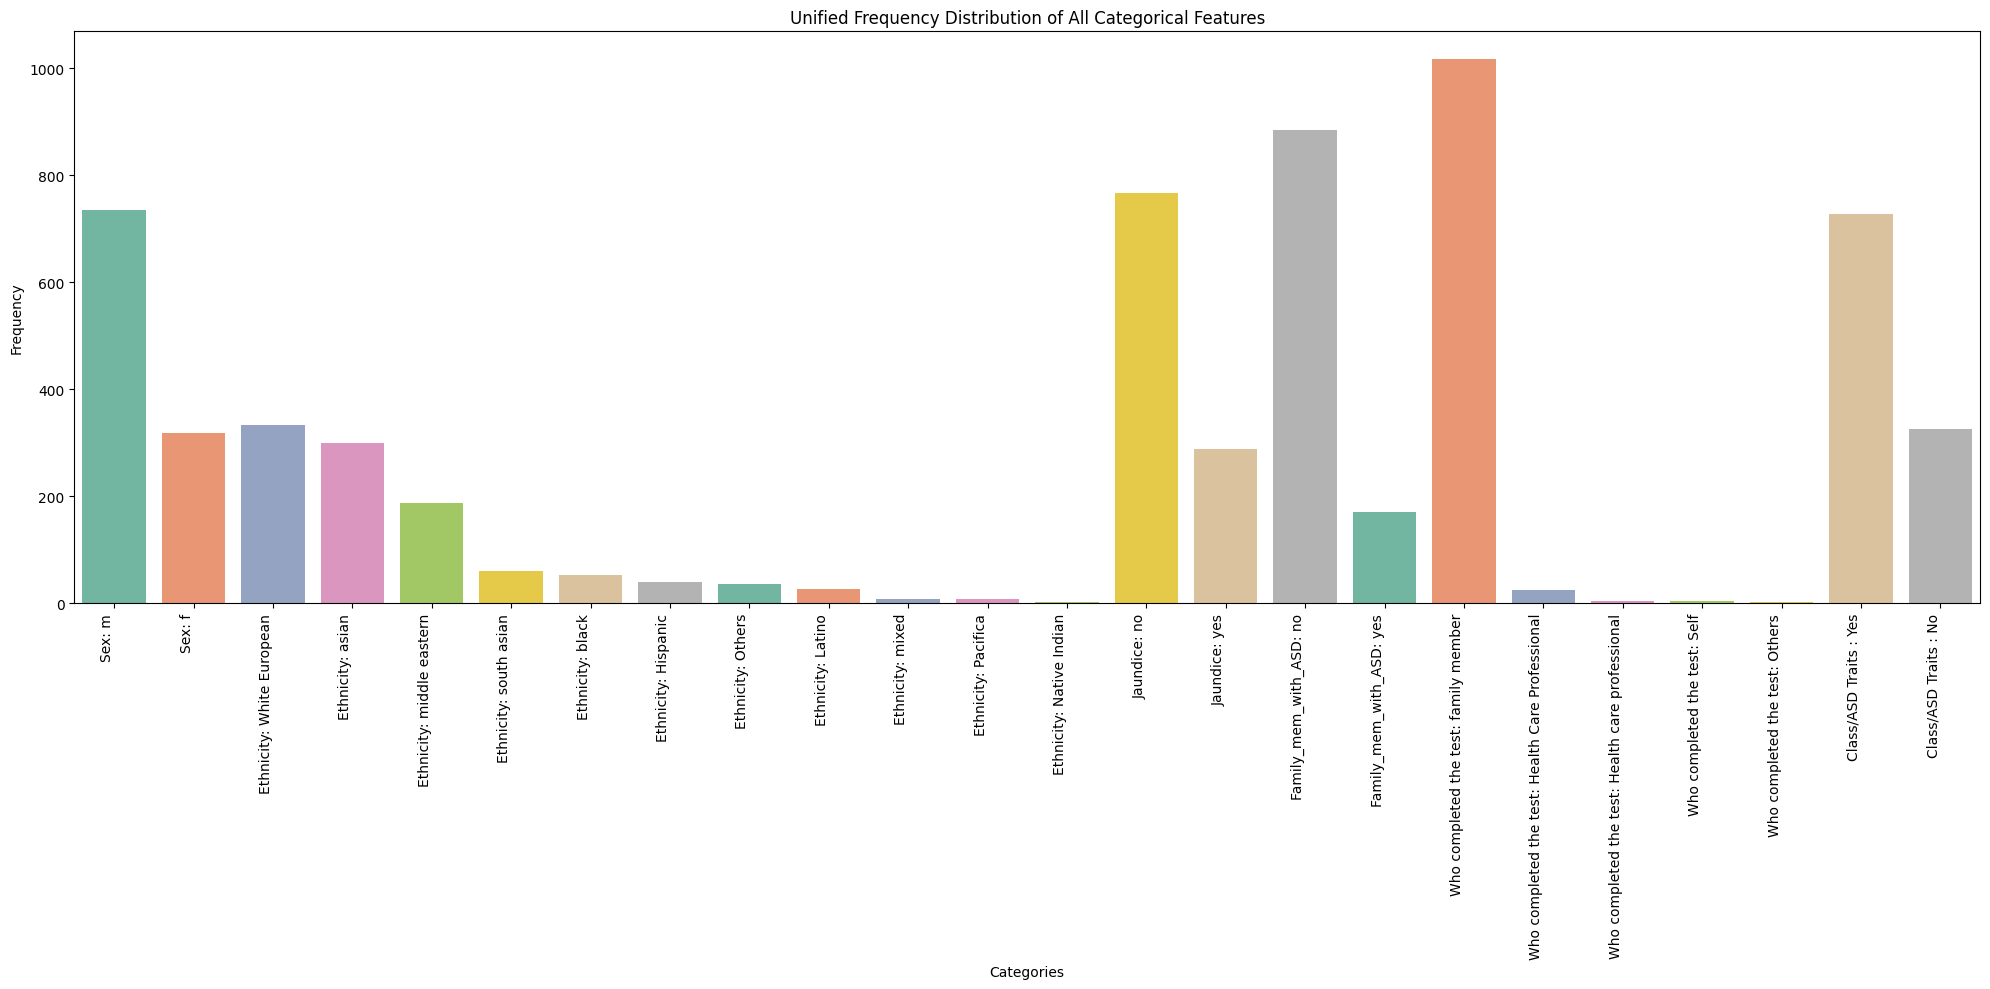

In [19]:
categorical_columns = updated_df.select_dtypes(include=['object']).columns
combined_counts_list = []
for col in categorical_columns:
    category_counts = updated_df[col].value_counts()
    category_counts.index = [f'{col}: {idx}' for idx in category_counts.index]  # Label with feature name
    combined_counts_list.append(category_counts)
combined_counts = pd.concat(combined_counts_list)
combined_counts_df = combined_counts.reset_index()
combined_counts_df.columns = ['Category', 'Frequency']
combined_counts_df['Feature'] = combined_counts_df['Category'].apply(lambda x: x.split(':')[0])
plt.figure(figsize=(20, 10))
sns.barplot(x='Category', y='Frequency', hue='Category', data=combined_counts_df, dodge=False, palette='Set2', legend=False)
plt.title('Unified Frequency Distribution of All Categorical Features')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [20]:
categorical_columns = updated_df.select_dtypes(include=['object', 'category']).columns
threshold_ratio=0.2
outliers_dict = {}
for col in categorical_columns:
    category_counts = updated_df[col].value_counts()
    mean_freq = category_counts.mean()
    median_freq = category_counts.median()
    lower_threshold = median_freq * threshold_ratio
    outliers = category_counts[category_counts < lower_threshold]
    outliers_dict[col] = outliers
for feature, outlier_values in outliers_dict.items():
    if not outlier_values.empty:
        print(f"\nOutliers in {feature}:")
        print(outlier_values)


Outliers in Ethnicity:
Ethnicity
Native Indian    3
Name: count, dtype: int64


In [21]:
updated_df['Ethnicity'].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [22]:
native_indian_rows = updated_df[updated_df['Ethnicity'] == 'Native Indian']
print(native_indian_rows)

     A1  A3  A4  A5  A7  A8  A10        Age_range Sex      Ethnicity Jaundice  \
22    1   1   1   0   1   1    1  Preschool Entry   m  Native Indian      yes   
495   1   1   1   1   1   1    1  Preschool Entry   m  Native Indian      yes   
947   1   0   0   1   1   0    1  Preschool Entry   m  Native Indian       no   

    Family_mem_with_ASD    Who completed the test Class/ASD Traits   
22                  yes  Health Care Professional               Yes  
495                  no             family member               Yes  
947                  no             family member               Yes  


<p><strong>Conclusion</strong>: After implementing the frequency analysis of each feature, we identified the number of outliers and calculated the count of each value within the features where outliers were detected. Upon examining the rows containing these outliers, we found that the target value for all of them was "Yes," indicating that these individuals are autistic. Based on this observation, we decided to retain the outliers in the dataset to allow the model to become familiar with such inputs and learn from them. Keeping these outliers will help the model better recognize similar patterns in future predictions, enhancing its ability to correctly identify autistic individuals.</p>

# &bull; Data Visualization
### - Correlation analysis
<p>
    The heatmap visually represents the correlations between the dataset's features, encompassing both categorical and numerical variables. Categorical features are transformed into numerical values through Label Encoding, allowing the heatmap to offer a comprehensive view of all features suitable for correlation analysis. The Pearson correlation matrix is employed to measure the linear relationships between feature pairs, with values spanning from -1, indicating a perfect negative correlation, to +1, signifying a perfect positive correlation. To enhance interpretability, the heatmap utilizes a diverging colormap that clearly distinguishes between positive and negative correlations.
</p>

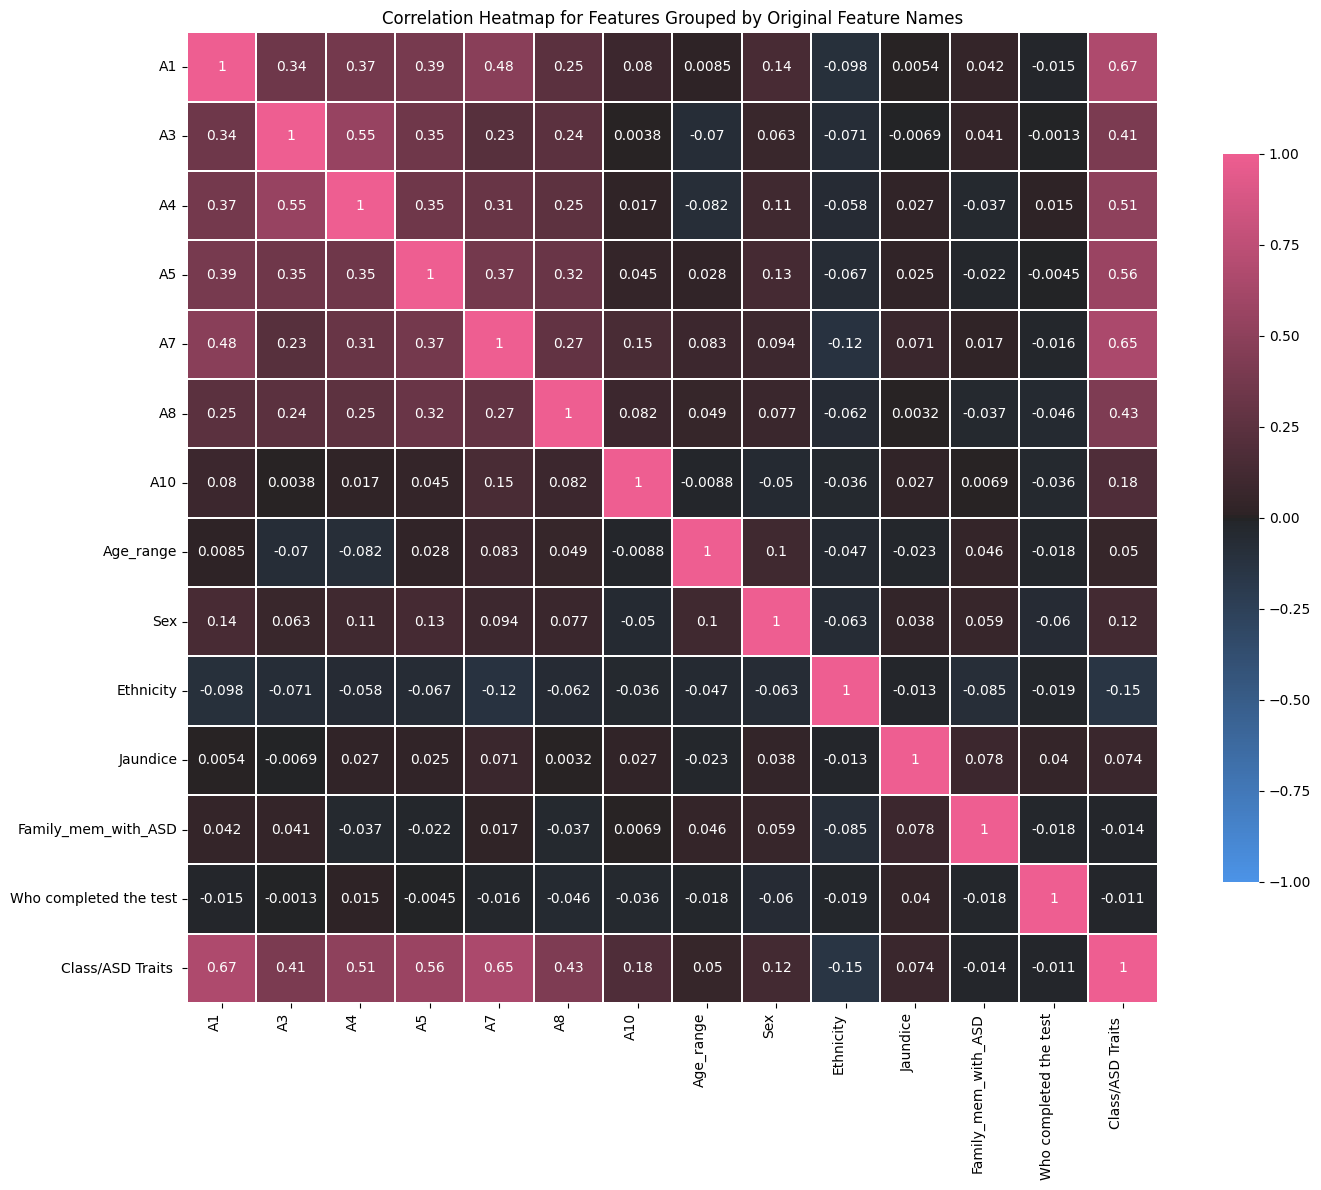

In [23]:
categorical_columns = updated_df.select_dtypes(include=['object', 'category']).columns
heatmap_df=copy.deepcopy(updated_df)
label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    heatmap_df[col] = label_encoder.fit_transform(heatmap_df[col])
    label_encoders[col] = label_encoder
corr = heatmap_df.corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.2, annot=True, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap for Features Grouped by Original Feature Names')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
printed_pairs = set() 
for col in corr.columns:
    sorted_corr = corr[col].sort_values(ascending=False)
    second_highest_corr = sorted_corr[1]  # Second highest after itself (which is 1.0)
    pair = tuple(sorted([col, sorted_corr.index[1]]))
    if pair not in printed_pairs:
        printed_pairs.add(pair)
        print(f"The highest correlation for {col} is with {sorted_corr.index[1]}: {second_highest_corr}")


The highest correlation for A1 is with Class/ASD Traits : 0.6672455850357913
The highest correlation for A3 is with A4: 0.54709959571369
The highest correlation for A5 is with Class/ASD Traits : 0.5632971772384437
The highest correlation for A7 is with Class/ASD Traits : 0.6494057122874157
The highest correlation for A8 is with Class/ASD Traits : 0.4271550681626077
The highest correlation for A10 is with Class/ASD Traits : 0.17983337128104715
The highest correlation for Age_range is with Sex: 0.10191783788727382
The highest correlation for Sex is with A1: 0.14138997291706648
The highest correlation for Ethnicity is with Jaundice: -0.012844217535073808
The highest correlation for Jaundice is with Family_mem_with_ASD: 0.07842724973313142
The highest correlation for Who completed the test is with Jaundice: 0.040156668343399336


### - Gender/ASD relationship
<p>Research has consistently highlighted that gender is a significant factor in the diagnosis of Autism Spectrum Disorder (ASD). Numerous studies indicate that men are more susceptible to being diagnosed with ASD compared to women. This gender disparity suggests underlying biological, genetic, and possibly social factors that influence the prevalence of ASD between genders. Understanding the relationship between gender and ASD is crucial, as it not only informs diagnostic practices but also helps tailor interventions and support systems that are sensitive to these differences. The graph depicting the relationship between gender and ASD further illustrates this trend.</p>

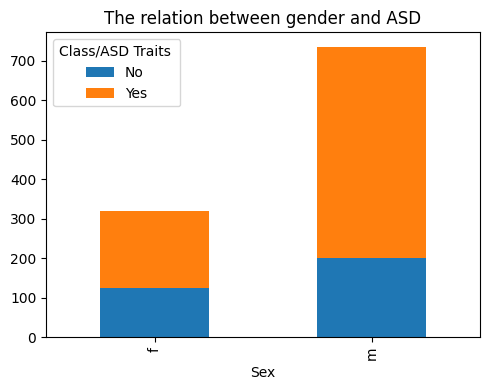

In [25]:
plt.figure(figsize=(5, 4))  
ax1 = plt.subplot(1, 1, 1)
output=pd.crosstab(updated_df['Sex'], updated_df['Class/ASD Traits ']).plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('The relation between gender and ASD')
plt.tight_layout()
plt.show()


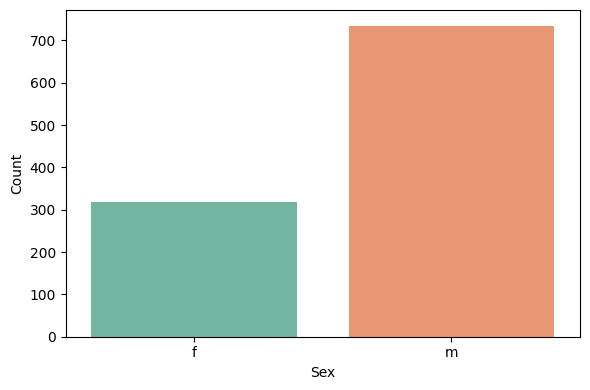

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=updated_df, hue='Sex', palette='Set2', dodge=False, legend=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<p>Based on our dataset and the number of males and females, we calculated the percentage for each gender as follows:</p>

In [27]:
n_male =len(updated_df[updated_df['Sex'] == 'm'])
n_female =len(updated_df[updated_df['Sex'] == 'f'])
male_autistic_count = len(updated_df[(updated_df['Sex'] == 'm') & (updated_df['Class/ASD Traits '] == 'Yes')])
female_autistic_count = len(updated_df[(updated_df['Sex'] == 'f') & (updated_df['Class/ASD Traits '] == 'Yes')])
print(f'Percentage of being autistic male: {male_autistic_count/n_male*100}')
print(f'Percentage of being autistic female: {female_autistic_count/n_female*100}')

Percentage of being autistic male: 72.6530612244898
Percentage of being autistic female: 60.81504702194357


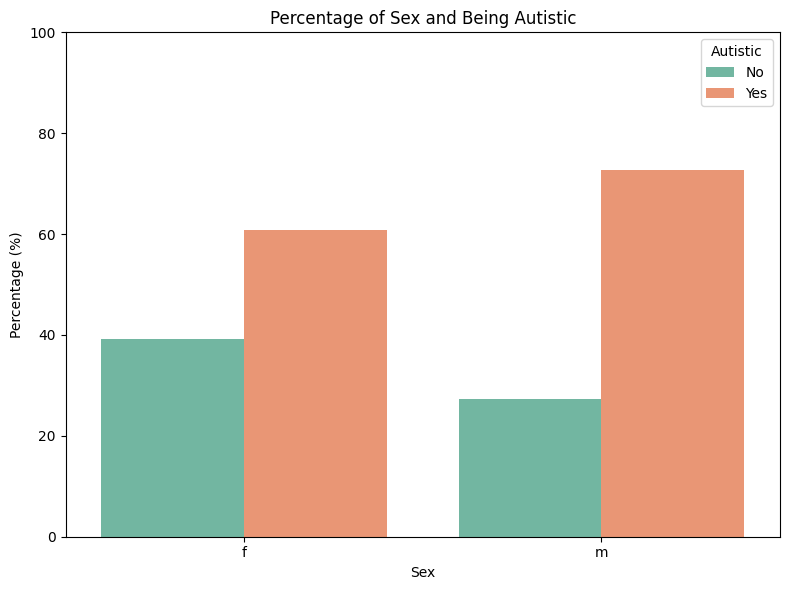

In [28]:
crosstab = pd.crosstab(updated_df['Sex'], updated_df['Class/ASD Traits '], normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab_melted = crosstab.melt(id_vars='Sex', value_name='Percentage', var_name='Autistic')
plt.figure(figsize=(8, 6))
sns.barplot(data=crosstab_melted, x='Sex', y='Percentage', hue='Autistic', palette='Set2')
plt.title('Percentage of Sex and Being Autistic')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### - Family member with ASD/ASD relationship
<p>Research suggests that autism develops from a combination of genetic, non-genetic, or environmental influences. However, based on our dataset, we cannot determine whether ASD is affected by genetics or not.</p>

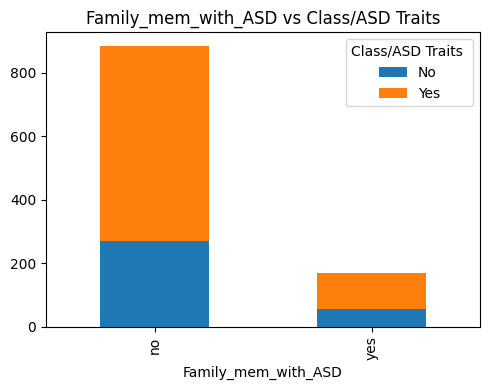

In [29]:
plt.figure(figsize=(5, 4)) 
ax1 = plt.subplot(1, 1, 1)
output=pd.crosstab(updated_df['Family_mem_with_ASD'], updated_df['Class/ASD Traits ']).plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Family_mem_with_ASD vs Class/ASD Traits')
plt.tight_layout()
plt.show()


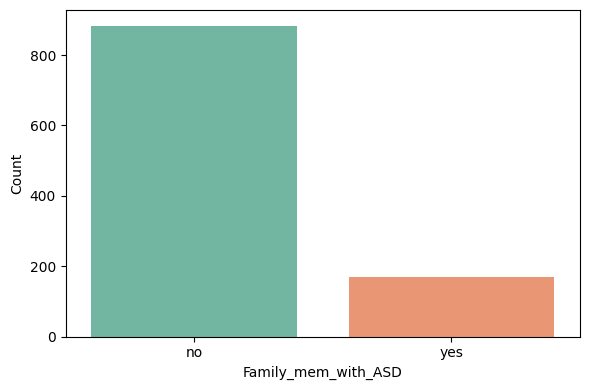

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Family_mem_with_ASD', data=updated_df, hue='Family_mem_with_ASD', palette='Set2', dodge=False, legend=False)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<p>The numbers below show the number of family members diagnosed with ASD:</p>

In [31]:
n_of_family_mem_with_asd =len(updated_df[updated_df['Family_mem_with_ASD'] == 'yes'])
n_of_family_mem_without_asd =len(updated_df[updated_df['Family_mem_with_ASD'] == 'no'])
count_family_asd_and_autistic = len(updated_df[(updated_df['Family_mem_with_ASD'] == 'yes') & (updated_df['Class/ASD Traits '] == 'Yes')])
count_no_family_asd_and_autistic = len(updated_df[(updated_df['Family_mem_with_ASD'] == 'no') & (updated_df['Class/ASD Traits '] == 'Yes')])
print(f'Percentage of being autistic with a family diagnosed as autistic: {count_family_asd_and_autistic/n_of_family_mem_with_asd*100}')
print(f'Percentage of being autistic with a family diagnosed as normal: {count_no_family_asd_and_autistic/n_of_family_mem_without_asd*100}')

Percentage of being autistic with a family diagnosed as autistic: 67.64705882352942
Percentage of being autistic with a family diagnosed as normal: 69.34389140271493


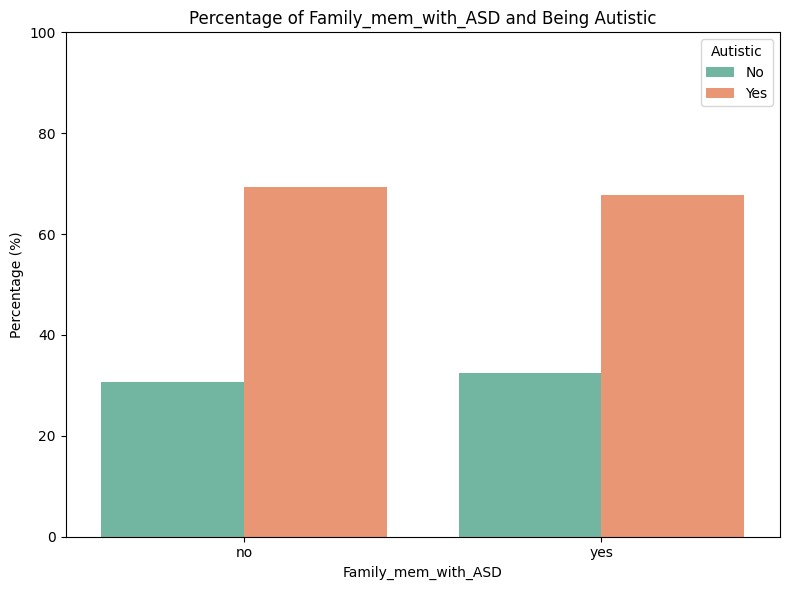

In [32]:
crosstab = pd.crosstab(updated_df['Family_mem_with_ASD'], updated_df['Class/ASD Traits '], normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab_melted = crosstab.melt(id_vars='Family_mem_with_ASD', value_name='Percentage', var_name='Autistic')
plt.figure(figsize=(8, 6))
sns.barplot(data=crosstab_melted, x='Family_mem_with_ASD', y='Percentage', hue='Autistic', palette='Set2')
plt.title('Percentage of Family_mem_with_ASD and Being Autistic')
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### - Ethnicity/ASD relationship

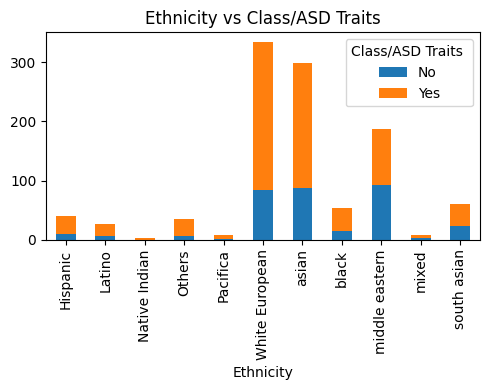

In [33]:
plt.figure(figsize=(5, 4)) 
ax3 = plt.subplot(1, 1, 1)

pd.crosstab(updated_df['Ethnicity'], updated_df['Class/ASD Traits ']).plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Ethnicity vs Class/ASD Traits')

plt.tight_layout()
plt.show()


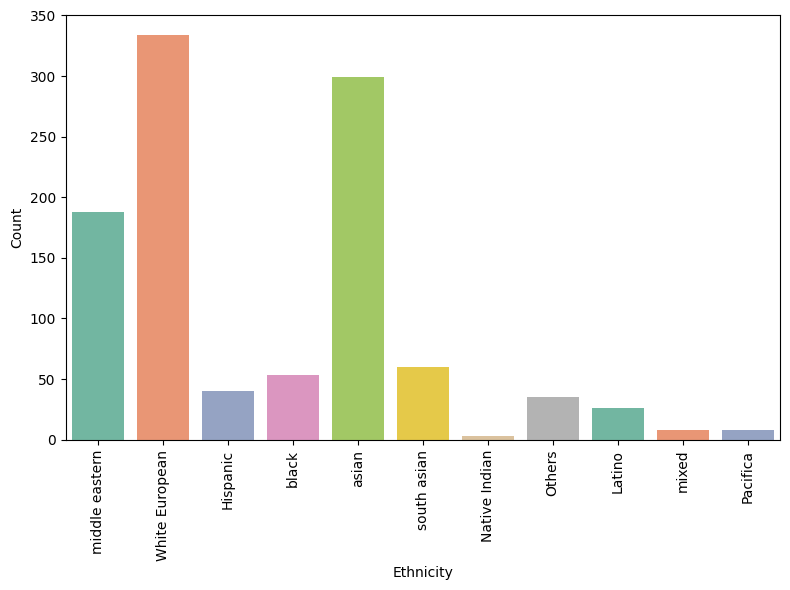

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ethnicity', data=updated_df, hue='Ethnicity', palette='Set2', dodge=False, legend=False)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


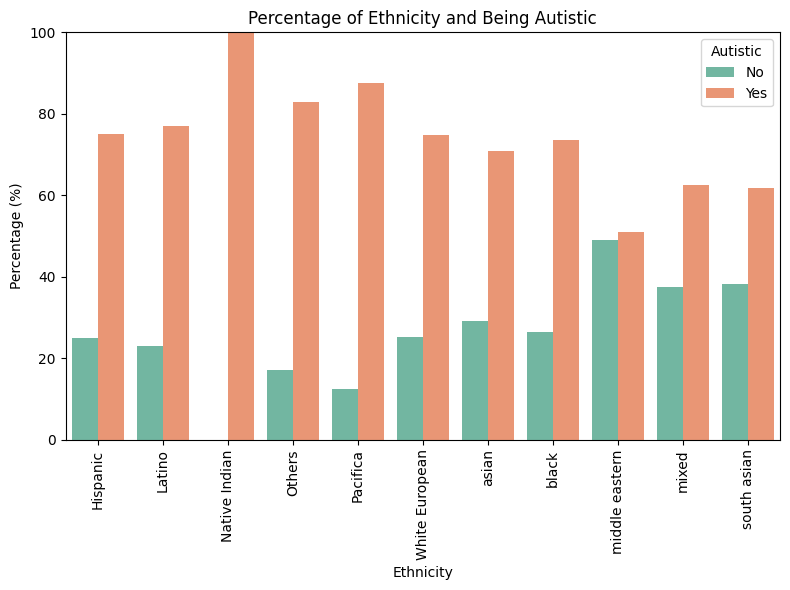

In [35]:
crosstab = pd.crosstab(updated_df['Ethnicity'], updated_df['Class/ASD Traits '], normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab_melted = crosstab.melt(id_vars='Ethnicity', value_name='Percentage', var_name='Autistic')
plt.figure(figsize=(8, 6))
sns.barplot(data=crosstab_melted, x='Ethnicity', y='Percentage', hue='Autistic', palette='Set2')
plt.title('Percentage of Ethnicity and Being Autistic')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### - Interesting Questions
<p>Based on DSM-5 criteria, groups A and B play a crucial role in diagnosing autism spectrum disorder. For group A, which includes social communication and interaction challenges, a minimum score of 3 is required. For group B, which covers restrictive and repetitive behaviors, a score of 2 or more is needed. These criteria are utilized by healthcare professionals to diagnose autism.

The first graph shows the relationship between group A, which is the sum of scores from questions 'A1', 'A5', and 'A7', and the diagnosis of autism. It indicates that the number of individuals diagnosed as autistic increases as the group A score rises.

The second graph illustrates the relationship between group B, represented by the sum of questions 'A3', 'A4', 'A8', and 'A10', and autism diagnosis. It similarly shows that the number of autistic diagnoses increases as the group B score rises.

The final graph displays various combinations of group A and B scores in relation to autism diagnosis. It highlights that when the group A score is 3, an increase in the group B score corresponds with a higher number of individuals diagnosed with autism.</p>

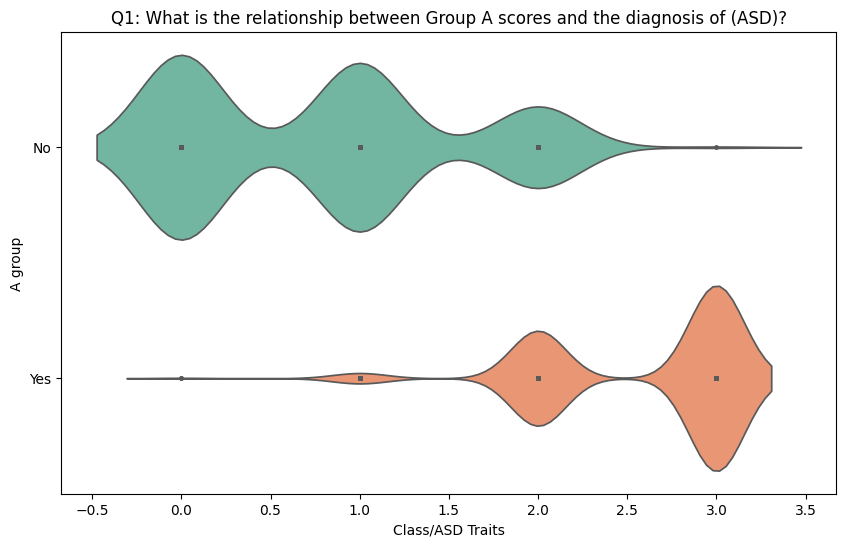

In [36]:
A_group_sum = updated_df[['A1', 'A5', 'A7']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.violinplot(x=A_group_sum, y=updated_df['Class/ASD Traits '], hue=updated_df['Class/ASD Traits '], inner="point", palette="Set2", legend=False)
plt.title('Q1: What is the relationship between Group A scores and the diagnosis of (ASD)?')
plt.xlabel('Class/ASD Traits')
plt.ylabel('A group')
plt.show()

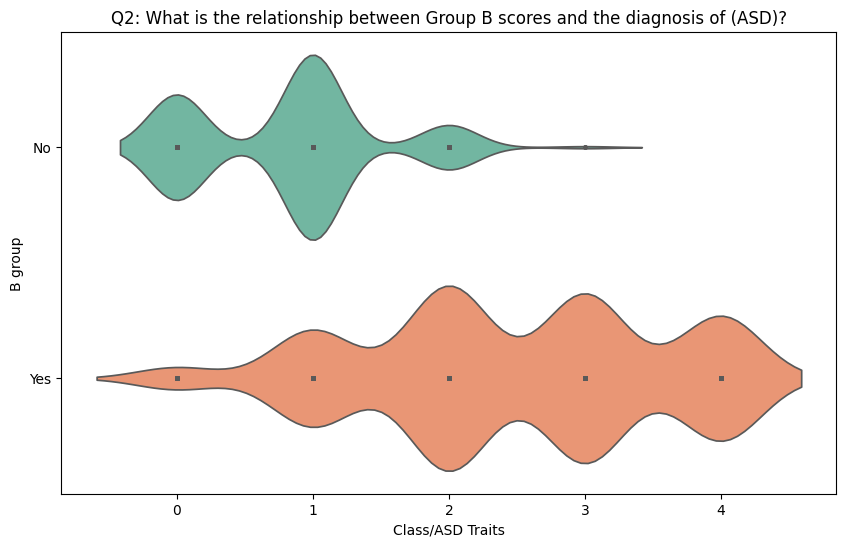

In [37]:
B_group_sum = updated_df[['A3', 'A4', 'A8','A10']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.violinplot(x=B_group_sum, y=updated_df['Class/ASD Traits '], hue=updated_df['Class/ASD Traits '], inner="point", palette="Set2", legend=False)
plt.title('Q2: What is the relationship between Group B scores and the diagnosis of (ASD)?')
plt.xlabel('Class/ASD Traits')
plt.ylabel('B group')
plt.show()

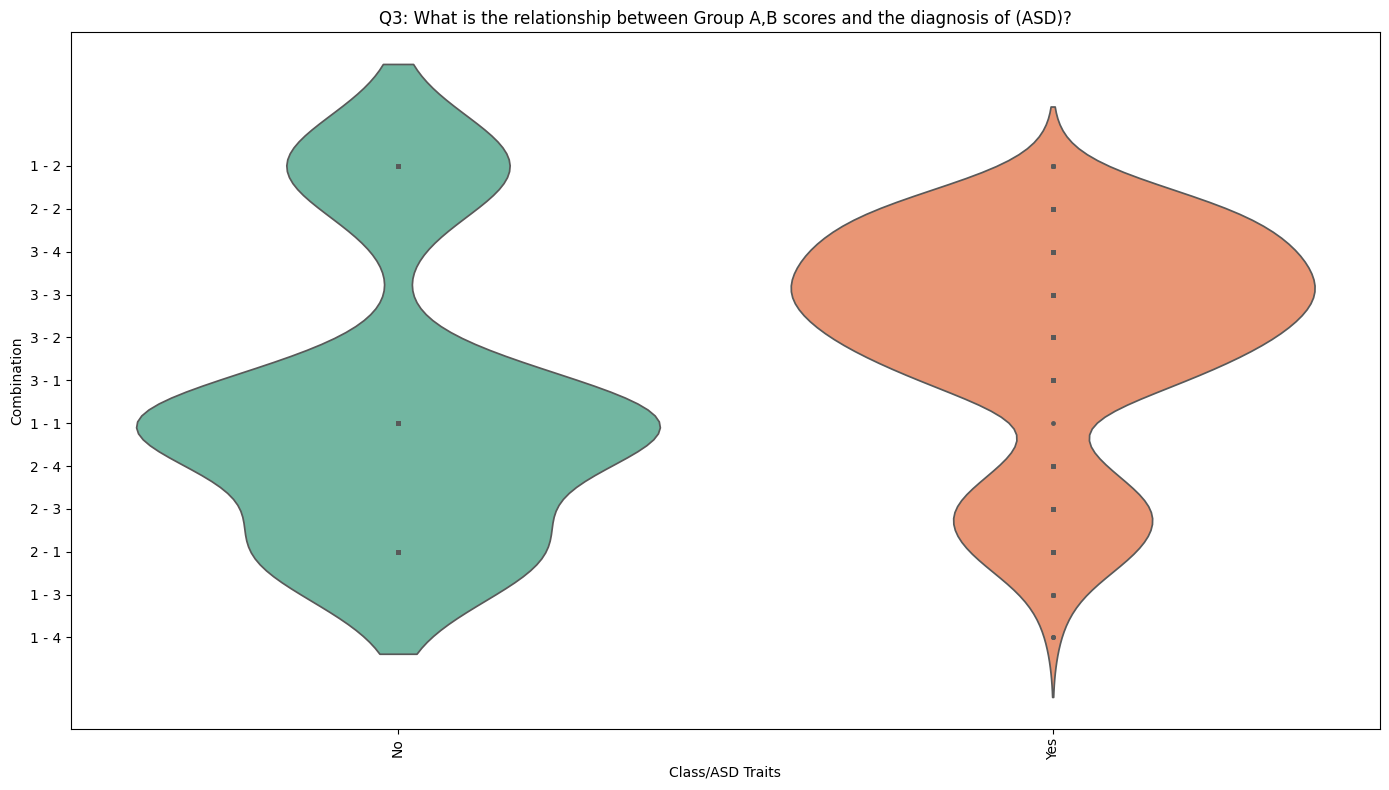

In [38]:
A_group_sum = updated_df[['A1', 'A5', 'A7']].sum(axis=1)
B_group_sum = updated_df[['A3', 'A4', 'A8', 'A10']].sum(axis=1)
summary_df = pd.DataFrame({
    'A_group_sum': A_group_sum,
    'B_group_sum': B_group_sum,
    'Class_ASD_Traits': updated_df['Class/ASD Traits ']
})
filtered_summary_df = summary_df[(summary_df['A_group_sum'] != 0) & (summary_df['B_group_sum'] != 0)].copy()
filtered_summary_df['Combination'] = filtered_summary_df['A_group_sum'].astype(str) + " - " + filtered_summary_df['B_group_sum'].astype(str)
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Class_ASD_Traits', 
    y='Combination', 
    hue='Class_ASD_Traits', 
    data=filtered_summary_df, 
    inner="point", 
    palette="Set2", 
    density_norm='width', 
    legend=False
)
plt.title('Distribution of A_group_sum and B_group_sum Combinations vs Class/ASD Traits (Filtered)')
plt.xlabel('Class/ASD Traits')
plt.title('Q3: What is the relationship between Group A,B scores and the diagnosis of (ASD)?')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<p style="font-size:18px">Q4: How does being diagnosed with jaundice, age range, and autism spectrum disorder (ASD) relate to each other?</p>
<p>The plot shows that being diagnosed with autism is more prevalent in children without jaundice across all age ranges, particularly in those entering preschool.</p>

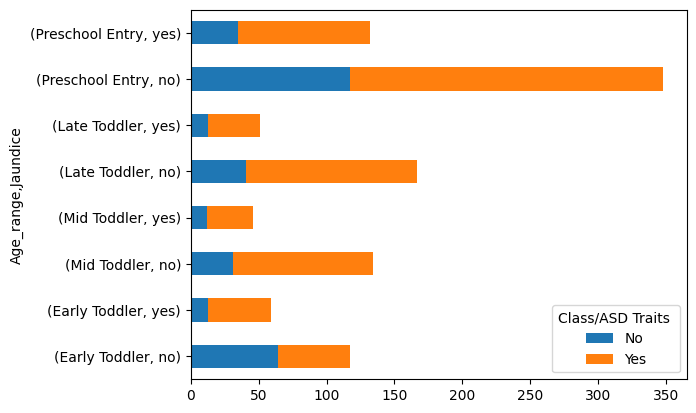

In [39]:
autistic = pd.crosstab([updated_df['Age_range'],
                        updated_df['Jaundice']],
                       updated_df['Class/ASD Traits '])
autistic.plot(kind='barh', stacked=True)
plt.show()

<p style="font-size: 18px"><b><i>Conclusion</i></b></p>

<p>
The data highlights several key factors that influence the diagnosis of Autism Spectrum Disorder (ASD), including gender, age, DSM-5 criteria, and potential ethnic differences. A significant gender disparity exists, with males being diagnosed with ASD more frequently than females, likely due to both biological differences and diagnostic biases. Although ASD is known to be influenced by a combination of genetic and environmental factors, this dataset does not provide definitive insights into the genetic contributions. The analysis of DSM-5 criteria highlights the importance of specific social and behavioral challenges in diagnosing ASD, showing that higher scores in these areas correlate with increased diagnoses. Additionally, the prevalence of ASD appears higher in children without jaundice across all age ranges, particularly in those entering preschool. These findings highlight the need for more tailored diagnostic approaches that consider these diverse influences to improve early detection and support for individuals with ASD
</p>

### - Exceptional Work
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2 {
            color: #333;
        }
        h1 {
            margin-bottom: 0.5em;
        }
        p {
            margin-bottom: 1em;
        }
        ul {
            margin-bottom: 1em;
            padding-left: 20px;
        }
        code {
            background-color: #f4f4f4;
            padding: 2px 4px;
            border-radius: 4px;
        }
    </style>
</head>
<body>

<h3>UMAP (Uniform Manifold Approximation and Projection)</h3>
<p>UMAP is a dimensionality reduction technique that aims to preserve the local structure and global relationships of data points in a high-dimensional space. It's particularly effective for visualizing complex datasets.</p>

<p>UMAP works by constructing a graph representing the data points and their relationships, and then projecting this graph onto a lower-dimensional space while preserving the local and global structure. This allows for visualization and analysis of high-dimensional data in a more understandable manner.</p>

<h3>Key Equations</h3>

<h3>1. Similarity Matrix:</h3>
<ul>
    <li><strong>Euclidean Distance:</strong> For numerical data, the Euclidean distance is often used to calculate pairwise similarities.</li>
    <li><strong>Cosine Similarity:</strong> For categorical or textual data, cosine similarity might be more appropriate.</li>
</ul>

<h3>2. Joint Probability Distribution:</h3>
<ul>
    <li>UMAP constructs a joint probability distribution based on the similarity matrix. This distribution represents the probability of two points being neighbors in the high-dimensional space.</li>
    <li>The probability of points i and j being neighbors is calculated using a Gaussian kernel:</li>
</ul>

<p style="margin-left: 20px;"><code>p(i|j) = exp(-d(i,j)^2 / (2 * sigma^2)) / sum_k exp(-d(i,k)^2 / (2 * sigma^2))</code></p>

<p style="margin-left: 20px;">where:</p>
<ul style="margin-left: 20px;">
    <li><em>d(i,j)</em> is the distance between points <em>i</em> and <em>j</em>.</li>
    <li><em>sigma</em> is a parameter controlling the neighborhood size.</li>
</ul>

<h3>3. Low-Dimensional Embedding:</h3>
<ul>
    <li>UMAP aims to find a low-dimensional representation of the data that preserves the joint probability distribution.</li>
    <li>This is achieved by minimizing a loss function that measures the divergence between the joint probability distribution in the high-dimensional space and the joint probability distribution in the low-dimensional space.</li>
    <li>The loss function is typically based on Kullback-Leibler divergence or negative cross-entropy.</li>
</ul>

</body>
</html>

In [40]:
numerical_df = updated_df.select_dtypes(include=[np.number])
categorical_df = updated_df.select_dtypes(include=['object', 'category'])
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(categorical_df)
combined_data = np.hstack((numerical_df.values, encoded_categorical))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)
n_neighbors_options = [5, 10, 15, 20, 25, 30]
min_dist_options = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8]
metric_options = ['euclidean', 'manhattan', 'cosine']
best_score = -1
best_params = None
best_embedding = None
for n_neighbors, min_dist, metric in product(n_neighbors_options, min_dist_options, metric_options):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=None)  
    jittered_data = scaled_data + np.random.normal(0, 0.01, scaled_data.shape)
    embedding = reducer.fit_transform(jittered_data)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  
    cluster_labels = kmeans.fit_predict(embedding)
    score = silhouette_score(embedding, cluster_labels)
    if score > best_score:
        best_score = score
        best_params = (n_neighbors, min_dist, metric)
        best_embedding = embedding

print(f"Best UMAP Parameters: n_neighbors={best_params[0]}, min_dist={best_params[1]}, metric='{best_params[2]}'")
print(f"Best Silhouette Score: {best_score}")
plt.figure(figsize=(10, 8))
plt.scatter(best_embedding[:, 0], best_embedding[:, 1], c=updated_df['Class/ASD Traits '].map({'No': 0, 'Yes': 1}), cmap='Spectral', s=10)
plt.title('Best UMAP Embedding')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Class/ASD Traits')
plt.show()


NameError: name 'OneHotEncoder' is not defined

<p style="font-size: 18px"><b><i>Resources</i></b></p>
<ul>
    <li>
        Zwaigenbaum L., Bryson S. E., Szatmari P., Brian J., Smith I. M., Roberts W., et al. [2012]. 
        <i>Sex differences in children with autism spectrum disorder identified within a high-risk infant cohort.</i> 
        Journal of Autism and Developmental Disorders, 42, 2585–2596. 
        <a href="https://pubmed.ncbi.nlm.nih.gov/22453928" target="_blank">PMID: 22453928</a>
    </li>
    <li>
        <a href="https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers" target="_blank">
            Autism Screening for Toddlers Dataset
        </a> - A dataset available on Kaggle that contains information on autism screening for toddlers, useful for research and analysis.
    </li>
    <li>
        <a href="https://pair-code.github.io/understanding-umap/" target="_blank">
            Understanding UMAP
        </a> - A detailed guide on UMAP (Uniform Manifold Approximation and Projection) by Google’s PAIR team, explaining the fundamentals of UMAP for dimensionality reduction.
    </li>
    <li>
        <a href="https://github.com/lmcinnes/umap" target="_blank">
            UMAP GitHub Repository
        </a> - The official GitHub repository for UMAP, providing code, documentation, and examples for implementing UMAP in various projects.
    </li>
    <li>
        <a href="https://chatgpt.com/" target="_blank">
            ChatGPT
        </a> - Access to OpenAI's conversational AI model, useful for generating insights, answering questions, and exploring language-based AI applications.
    </li>
    <li>
        <a href="https://www.autismspeaks.org/autism-diagnosis-criteria-dsm-5" target="_blank">
            Autism Diagnosis Criteria (DSM-5) - Autism Speaks
        </a> - Information on the DSM-5 criteria used for diagnosing autism, providing essential guidelines for understanding ASD diagnostic processes.
    </li>
    <li>
        <a href="https://www.psychiatry.org/psychiatrists/practice/dsm" target="_blank">
            DSM-5 Resources - American Psychiatric Association
        </a> - Resources from the American Psychiatric Association on the Diagnostic and Statistical Manual of Mental Disorders (DSM-5), including diagnostic criteria and updates.
    </li>
</ul>